<a href="https://colab.research.google.com/github/Wiskadoj1/Practicas_EDA_Python/blob/main/Practica%2012/Practica12_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libreta Práctica 12


##Recursividad:

El propósito de la recursividad es dividir un problema en problemas más pequeños, de tal manera que la solución del problema se vuelva trivial. Básicamente, la recursión se puede explicar como una función que se llama así misma.

Para aplica recursión se deben de cumplir tres reglas:
*   Debe de haber uno o más casos base.
*   La expansión debe terminar en un caso base.
*   La función se debe llamar a sí misma.


##Factorial

Uno de los ejemplos más básicos es el cálculo del factorial cuya fórmula se muestra a continuación:

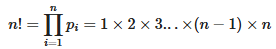

Tip: En las notebooks se pueden agregar expresiones matemáticas usando Latex (https://latex-project.org/intro.html), tal y como se muestra en la formula anterior. La fórmula se tiene que encerrar usando $$ al principio y al final de la misma.

En el siguiente ejemplo se calcula el factorial de un número de forma iterativa usando un ciclo for

In [ ]:
def factorial_no_recursivo(numero):
    fact = 1
    #Se genera una lista que ve de n a 1, el -1 indica que cada iteración se resta 1 al índice.
    for i in range(numero, 1, -1):
        fact *= i   # Esto es equivalente a fact = fact * i
    return fact
factorial_no_recursivo(5)

120

Como se mencionó anteriormente, para resolver un problema por medio de recursividad hay que generar problemas más pequeños. Analizando la forma en que se calcula el factorial en la función pasada se tiene que:


image.png

Si se remueve el 5 se tiene:

image.png

Se puede afirmar que

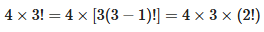

Si se aplica esto a toda la secuencia, al final tenemos la siguiente expansión:

image.png

Aplicando las reglas explicadas en un principio sobre recursividad, se puede resolver el problema del factorial por medio de recursión de la siguiente manera:

In [ ]:
def factorial_recursivo(numero):
    if numero < 2:    # El caso base es cuando numero < 2 y la función regresa 1
        return 1
    return numero * factorial_recursivo(numero - 1) # La función se llama a sí misma
factorial_recursivo(5)

120

De la ejecución de factorial_recursivo() se puede observar lo siguiente:

*    El caso base permite terminar la recursión.
*    Conforme se va decrementando la variable numero, se aproxima al caso base. El caso base ya no necesita recursión debido a que se convirtió en la versión más simple del problema.
*    La función se llama a sí misma y toma el lugar del ciclo for usado en la función factorial_no_recursivo().
*    Cada que se llama de nuevo a la función, ésta tiene la copia de las variables locales y el valor de los parámetros.


Tip: En el caso de Python, hay un límite en el número de veces que se puede llamar recursivamente una función, si se excede ese límite se genera el error: maximum recursion depth exceeded in comparison. Este límite puede ser modificado, pero no es recomendable.

In [ ]:
#Al tratar de calcular el factorial de 1000 se excede el límite permitido de recursiones
#factorial_recursivo(1000)


##Huellas de tortuga

Para el siguiente ejemplo, se va a utilizar la biblioteca turtle. Como se observa en la siguiente imagen, hay una tortuga que se desplaza en espiral. Este ejemplo ha sido tomado del tutorial de la biblioteca turtle que se puede consultar en http://openbookproject.net/thinkcs/python/english3e/hello_little_turtles.html.

El objetivo es hacer que la tortuga deje un determinado número de huellas, cada una de las huellas se va a ir espaciando incrementalmente mientras ésta avanza. A contiuación se muestra la sección de código que hace el recorrido de la tortuga.
NOTA: La siguiente sección de código no se va a ejecutar en la notebook

###Archivo: recorrido_no_recursivo.py

In [ ]:
for i in range(30):         #Esta determinado que se impriman 30 huellas de la tortuga
   tess.stamp()             # Huella de la tortuga
   size = size + 3          # Se incrementa el paso de la tortuga cada iteración
   tess.forward(size)       # Se mueve la tortuga hacia adelante
   tess.right(24)           # y se gira a la derecha

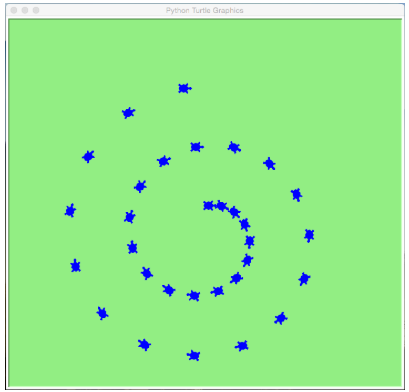

¿Cómo hacer el recorrido de la tortuga de manera recursiva? Primero se tiene que encontrar el caso base y después hacer una función que se va llame a sí misma. En esta función, el caso base es cuando se ha completado el número de huellas requerido. A continuación, se muestra el código de la función para el recorrido de la tortuga.

###Archivo: recorrido_recursivo.py

In [ ]:
def recorrido_recursivo(tortuga, espacio, huellas):
    if huellas > 0:
        tortuga.stamp()
        espacio = espacio + 3
        tortuga.forward(espacio)
        tortuga.right(24)
        recorrido_recursivo(tortuga, espacio, huellas-1)

NOTA: El código completo de las dos versiones se encuentra guardado en los archivos recorrido_recursivo.py y recorrido_no_recursivo.py. Estos se van a ejecutar desde la notebook como si de una ventana de comandos se tratara.

Tip: En las notebooks se pueden ejecutar comandos del sistema operativo, sólo se tiene que agregar el signo de admiración antes del comando (!comando). Si el comando no es del sistema operativo, se despliega un aviso.

Al momento de ejecutar las siguientes instrucciones, se abre una ventana donde se muestra el desplazamiento de la tortuga. Cuando se termina de ejecutar el código, es necesario cerrar la ventana para que finalice la ejecución en la notebook.

In [ ]:
#Ejecutando el código no recursivo.
!python recorrido_no_recursivo.py

Tip: Para la implementación recursiva (recorrido_recursivo.py) se hace uso de la biblioteca argparse, esta biblioteca permite mandar datos de entrada al programa por medio de banderas, tal y como se hace con los comandos del sistema operativo.

In [ ]:
ap = argparse.ArgumentParser()

#El dato de entrada se ingresa con la bandera --huellas
ap.add_argument("--huellas", required=True, help="número de huellas")

#Lo que se obtiene es un diccionario (llave:valor) , en este caso llamado args
args = vars(ap.parse_args())

# Los valores del diccionario son cadenas por lo que se tiene que transformar a un entero con la función int()
huellas = int(args["huellas"])

El código se ejecuta de la siguiente manera:

In [ ]:
# Como se observa, hay un espacio después del nombre del archivo
# y un espacio después de la bandera
!python recorrido_recursivo.py --huellas 25

La ventaja de utilizar esta forma de mandar datos de entrada al programa, es que hace la validación por nosotros, ya que si no se especifica la bandera o se especifica un valor, se genera un mensaje de error.

In [ ]:
!python recorrido_recursivo.py --huella

python3: can't open file '/content/recorrido_recursivo.py': [Errno 2] No such file or directory


##Fibonacci

Recordando, la implementación iterativa para calcular la sucesión de Fibonacci es:

def fibonacci_iterativo_v2(numero):

    f1=0
    f2=1
    for i in range(1, numero-1):
        f1,f2=f2,f1+f2    #Asignación paralela
    return f2

Esta función se puede transformar a su versión recursiva de la siguiente manera:

In [ ]:
def fibonacci_recursivo(numero):
    if numero == 1:     #Caso base
        return 0
    if numero == 2 or numero == 3:
        return 1
    return fibonacci_recursivo(numero-1) + fibonacci_recursivo(numero-2) #Llamada recursiva
fibonacci_recursivo(13)

144

Al igual que en la versión iterativa, se están repitiendo operaciones. Para calcular el elemento 5 se tiene:



f(5) =

    (n-1) = f(4)+f(3)+f(2)+f(1)
    (n-2) = f(3)+f(2)+f(1)

Retomando lo visto en la práctica 11, es posible mejorar la eficiencia del algoritmo si se utiliza memorización.

In [ ]:
#Memoria inicial
memoria = {1:0, 2:1, 3:1}
def fibonacci_memo(numero):
    if numero in memoria:      #Si el número ya se encuentra calculado, se regresa el valor ya no se hacen más cálculos
        return memoria[numero]
    memoria[numero] = fibonacci_memo(numero-1) + fibonacci_memo(numero-2)
    return memoria[numero]
fibonacci_memo(13)

144

La memoria cambia después de la ejecución. En comparación con la versión iterativa de la guía 11, la función fibonacci_memo() tiene acceso a la variable memoria, por lo que efectua menos operaciones.

memoria

{1: 0,

 2: 1,

 3: 1,

 4: 2,

 5: 3,

 6: 5,

 7: 8,

 8: 13,

 9: 21,

 10: 34,

 11: 55,

 12: 89,

 13: 144}

A diferencia de la versión anterior, como los resultados se están guardando en la variable memoria, el número de operaciones que se realizan es menor. Para calcular el elemento 5 con la nueva implementación se tiene:



memoria =   {1:0, 2:1, 3:1}


f(5) =

    (n-1) = f(4)+memoria(3)+memoria(2)+memoria(1)
    (n-2) = memoria(3)

##Desventajas de la recursividad



1.   A veces es complejo generar la lógica para aplicar recursión.
2.   Hay una limitación en el número de veces que una función puede ser llamada, tanto en memoria como en tiempo de ejecución.



##Bibliografía

*  [1] Design and analysis of algorithms; Prabhakar Gupta y Manish Varshney; PHI Learning, 2012, segunda edición.

*  [2] Introduction to Algorithms, Thomas H. Cormen, Charles E. Leiserson, Ronald L. Rivest y Clifford Stein; The MIT Press; 2009, tercera edicion.

*  [3] Problem Solving with Algorithms and Data Structures using Python; Bradley N. Miller y David L. Ranum, Franklin, Beedle & Associates; 2011, segunda edition.
*  [4] http://openbookproject.net/thinkcs/python/english3e/hello_little_turtles.html

#Actividades de la práctica

#Torre de Hanoi

##Cálculo de cuantos movimientos mínimos se puede resolver las torres de Hanoi

In [ ]:
print("dame el número de discos de la torre")
x = int(input())
def movimientos(x):
    if x > 0:
        resultado = (2**(x))-1
        print("El número de movimientos para resolver la torre es", resultado)
    else:
        print("el número no es correcto")
movimientos(x)

dame el número de discos de la torre


##Movimientos para resolver la torre de Hanoi

In [ ]:
def imprimir_torres(torres):
    print("\nEstado de las torres:")
    for nombre in ['A', 'B', 'C']:
        print(f"{nombre}: {torres[nombre]}")
    print("-" * 30)
def mover_un_disco(torres, origen, destino):
    for i in range(len(torres[origen])):
        if torres[origen][i] != 0:
            disco = torres[origen][i]
            torres[origen][i] = 0
            break
    for j in range(len(torres[destino]) - 1, -1, -1):
        if torres[destino][j] == 0:
            torres[destino][j] = disco
            break
    print(f"Movimiento: mover disco {disco} de {origen} a {destino}")
    imprimir_torres(torres)
def torres_de_hanoi(n, origen, destino, auxiliar, torres):
    if n == 1:
        mover_un_disco(torres, origen, destino)
    else:
        torres_de_hanoi(n - 1, origen, auxiliar, destino, torres)
        mover_un_disco(torres, origen, destino)
        torres_de_hanoi(n - 1, auxiliar, destino, origen, torres)
print("----¿CÓMO RESOLVER LAS TORRES DE HANOI?----")
print("Ingresa el número de discos: ")
n = int(input())
origen = 'A'
auxiliar = 'B'
destino = 'C'
discos = [i for i in range(n, 0, -1)]
torre_A = [0] * (n - len(discos)) + discos[::-1]
torre_B = [0] * n
torre_C = [0] * n
torres = {
    'A': torre_A,
    'B': torre_B,
    'C': torre_C
}
print("\nEstado inicial:")
imprimir_torres(torres)
torres_de_hanoi(n, origen, destino, auxiliar, torres)
print("\n¡Juego terminado, los discos se han movido a la torre C!")

----¿CÓMO RESOLVER LAS TORRES DE HANOI?----
Ingresa el número de discos: 
3

Estado inicial:

Estado de las torres:
A: [1, 2, 3]
B: [0, 0, 0]
C: [0, 0, 0]
------------------------------
Movimiento: mover disco 1 de A a C

Estado de las torres:
A: [0, 2, 3]
B: [0, 0, 0]
C: [0, 0, 1]
------------------------------
Movimiento: mover disco 2 de A a B

Estado de las torres:
A: [0, 0, 3]
B: [0, 0, 2]
C: [0, 0, 1]
------------------------------
Movimiento: mover disco 1 de C a B

Estado de las torres:
A: [0, 0, 3]
B: [0, 1, 2]
C: [0, 0, 0]
------------------------------
Movimiento: mover disco 3 de A a C

Estado de las torres:
A: [0, 0, 0]
B: [0, 1, 2]
C: [0, 0, 3]
------------------------------
Movimiento: mover disco 1 de B a A

Estado de las torres:
A: [0, 0, 1]
B: [0, 0, 2]
C: [0, 0, 3]
------------------------------
Movimiento: mover disco 2 de B a C

Estado de las torres:
A: [0, 0, 1]
B: [0, 0, 0]
C: [0, 2, 3]
------------------------------
Movimiento: mover disco 1 de A a C

Estado de 

# Conclusiones

**Zarate Mendoza Luis Alejandro**

Como conlusión a la práctica, en mi opinión se consiguió completar su principal objetivo, que es comprender y aplicar el concepto de un algoritmo recursivo a un problema como lo es la resolución de las Torres de Hanoi. Este fue el caso más claro en el que comprender el problema que estamos tratando, e intentar resolverlo aplicando la lógica y los conocimientos previamente adquiridos a lo largo del curso fue esencial para la resolución del mismo. Por lo anteriormente mencionado, considero que se logró concretar la práctica 12 a manera de cierre del curso de Estructura de Datos y Algoritmos satisfactoriamente, brindandonos una serie de conocimientos y habilidades esenciales para nuestro desarrollo como futuros ingenieros.